[Data](https://zh.moegirl.org.cn/%E5%8A%A8%E7%94%BB%E9%94%80%E9%87%8F)

In [2]:
import csv
data = []
with open('data.csv', newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # 跳过表头
    for row in csvreader:
        row[0] = int(row[0]) 
        row[2] = int(row[2])  # Convert '累计销量' to integer
        row[3] = int(row[3])  # Convert '放送时间' to integer
        data.append(row)

for row in data[:5]:
    print(row)


[1, 'EVA', 223826, 1995, 'GAINAX']
[2, '赛马娘 Pretty Derby Season 2', 193581, 2021, 'STUDIO KAI']
[3, '化物语', 110291, 2009, 'SHAFT']
[4, '机动战士高达', 103303, 1979, 'Sunrise']
[5, 'LoveLive!第二季', 95607, 2014, 'Sunrise']


In [3]:
years = []
for row in data:
    years.append(row[3])
print(years[:5])  # Print the first 5 years to check

[1995, 2021, 2009, 1979, 2014]


In [4]:
# List Comprehension to extract years
years = [row[3] for row in data]
print(years[:5])  # Print the first 5 years to check

[1995, 2021, 2009, 1979, 2014]


In [5]:
# Sort the data list by the '放送时间' column (index 3)
sorted_data = sorted(data, key=lambda x: x[3], reverse=True)

print(sorted_data[:5])

[[71, '莉可丽丝', 29400, 2022, 'A-1 Pictures'], [92, '孤独摇滚', 25196, 2022, 'CloverWorks'], [117, '鬼灭之刃 游郭篇', 20595, 2022, 'Ufotable'], [146, 'LoveLive!虹咲学园学园偶像同好会第二季', 17041, 2022, 'Sunrise'], [2, '赛马娘 Pretty Derby Season 2', 193581, 2021, 'STUDIO KAI']]


In [6]:
data_2020 = [row for row in data if row[3] == 2020]
print(data_2020)

[[58, '公主连结Re:Dive', 32219, 2020, 'CygamesPictures'], [82, '咒术回战', 27549, 2020, 'MAPPA'], [99, 'LoveLive!虹咲学园学园偶像同好会', 22884, 2020, 'Sunrise']]


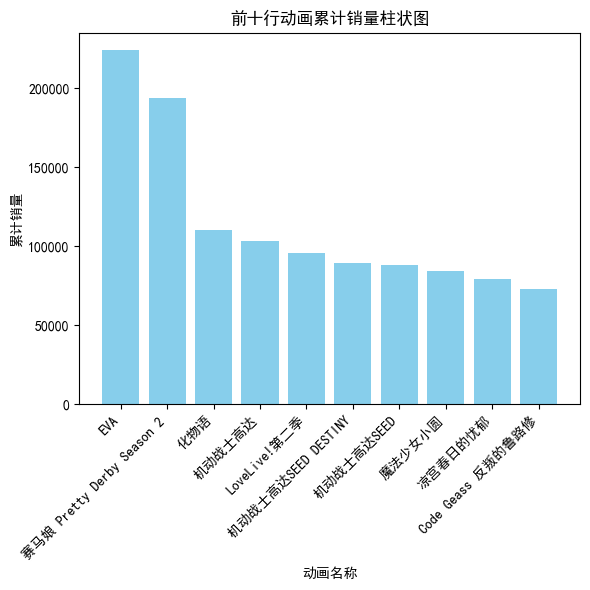

In [9]:
import matplotlib.pyplot as plt

# 提取前十行的动画名称和累计销量
names = [row[1] for row in data[:10]]
cumulative_sales = [row[2] for row in data[:10]]

# 绘制柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 6))
plt.bar(names, cumulative_sales, color='skyblue')
plt.xlabel('动画名称')
plt.ylabel('累计销量')
plt.title('前十行动画累计销量柱状图')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

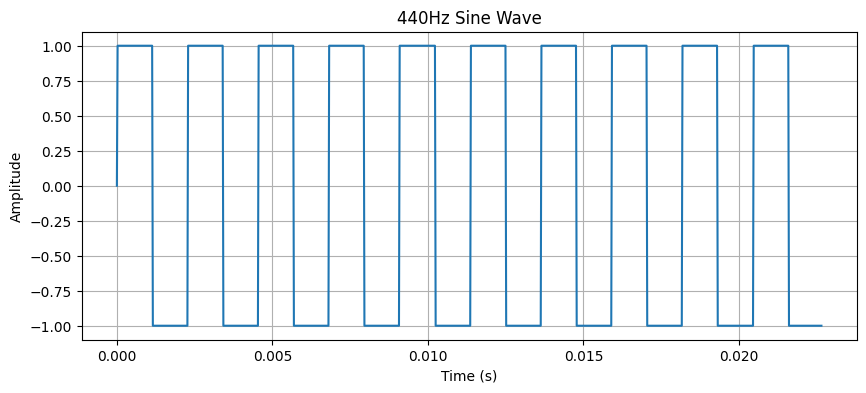

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
sampling_rate = 44100  # 采样率，单位为 Hz
duration = 1  # 持续时间，单位为秒
frequency = 440  # 正弦波频率，单位为 Hz

# 生成时间序列
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# 生成正弦波
sine_wave = np.sin(2 * np.pi * frequency * t)
square_wave = np.sign(sine_wave)

# 绘制正弦波
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], square_wave[:1000])  # 只绘制前1000个点以便更清晰地观察波形
plt.title("440Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [3]:
from scipy.io.wavfile import write

# 保存为 WAV 文件
write("sine_wave.wav", sampling_rate, sine_wave.astype(np.float32))

In [4]:
write("square_wave.wav", sampling_rate, square_wave.astype(np.float32))

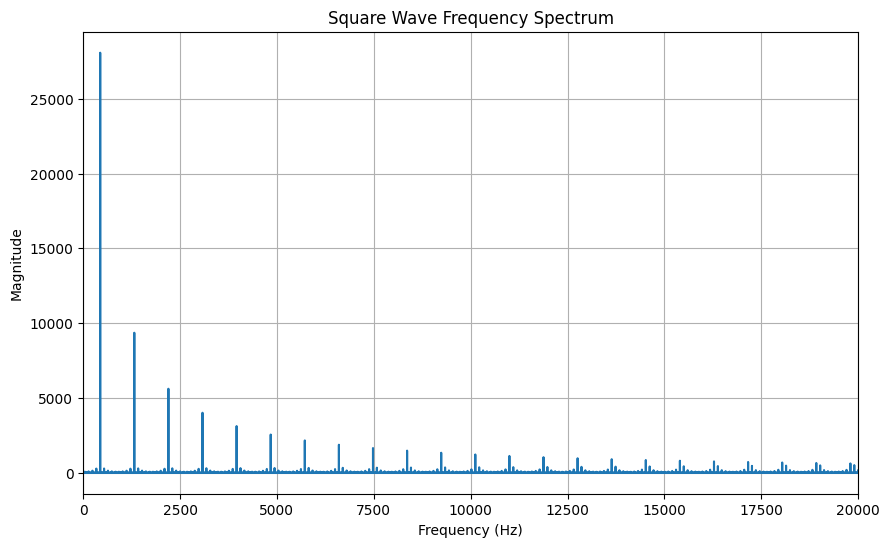

In [ ]:

# 计算方波的频谱
fft_result = np.fft.fft(square_wave)
frequencies = np.fft.fftfreq(len(square_wave), d=1/sampling_rate)

# 只取正频率部分
positive_frequencies = frequencies[:len(frequencies)//2]
magnitude = np.abs(fft_result[:len(fft_result)//2])

# 绘制频谱
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, magnitude)   
plt.title("Square Wave Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(0, 20000)  # 限制频率范围以便更清晰地观察
plt.show()